# Fallateikning
1. Skrifið forrit sem reiknar fallsgildi fallsins: 
$f(x) = (x+3)(x+2)x(x-2)(x-3)$ 
Prófið t.d. að reikna f(1) (á að gefa 24)

In [4]:
def fallateikning(x):
    return (x+3) * (x+2) * x * (x-2) * (x-3)

print(fallateikning(1))

24


2. Búið til vandaða teikningu af fallinu á bilinu [−3.4,3.4] sbr. kafla 9.6. Notið linspace fallið og stikana/föllin xlim, ylim, xticks, yticks, linewidth, color, axvline, axhline, grid, box og tick_params með hæfilegum viðföngum.

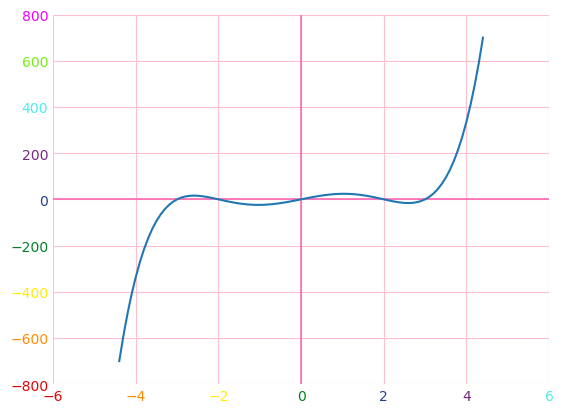

In [5]:
# Búið til vandaða teikningu af fallinu á bilinu [−3.4,3.4] sbr. kafla 9.6. 
# Notið linspace fallið og stikana/föllin xlim, ylim, xticks, yticks, linewidth, color, axvline, axhline, grid, 
# box og tick_params með hæfilegum viðföngum.

import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
my_colors = ['#E40303', '#FF8C00', '#FFED00', '#008026', '#24408E', '#732982','#4deeea', '#74ee15','#f000ff']
plt.xlim([-4.4, 4.4])
plt.ylim([-400, 401])
plt.xticks(np.arange(-6,7,2))
plt.yticks(np.arange(-800,801,200))
plt.plot(lw=4, c='b', )
plt.axvline(c='#FF69B4', lw=1.2)
plt.axhline(c='#FF69B4', lw=1.2)
plt.grid(True, c='#FFC0CB')
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.box(False)
x=np.arange(-4.4,4.5,0.1)
y=[fallateikning(xi) for xi in x]
plt.tick_params(length=0)
plt.plot(x,y)
plt.show()

# Hiti og úrkoma
1. Veðurskrá lesin. Í skránni cs.hi.is/python/hiti-urkoma.txt eru gögn um meðalárshita og úrkomu í Stykkishólmi 1949–2018. Lesið gögnin í skrána inn í þrjá lista og prentið út upplýsingar fyrir fyrstu 5 og síðustu 5 árin (x[-5:] gefur öftustu 5 stök í x).

In [1]:
import numpy as np
file = "https://cs.hi.is/python/hiti-urkoma.txt"
(x,y,z) = np.loadtxt(file,dtype=str).T
year = x.astype(int)
avg = y.astype(float)
rainfall = z.astype(float)
print(f"Ár        Meðalárshiti      Úrkoma")
for i in range(0,5):
    print(f"{year[i]:<13} {avg[i]:<13} {rainfall[i]}")
for i in range(-5,0):
    print(f"{year[i]:<13} {avg[i]:<13} {rainfall[i]}")


Ár        Meðalárshiti      Úrkoma
1949          3.2           565.5
1950          4.0           535.5
1951          3.4           460.6
1952          3.6           495.7
1953          4.4           979.0
2014          5.3           678.8
2015          4.1           804.4
2016          5.5           806.2
2017          4.9           678.6
2018          4.5           875.3


2. Meðalhiti og köld ár. Notið föllin í köflum 6.3 og 6.4 til að finna:

    meðalhita allra áranna (summa deilt með fjölda)

    kaldasta árið og meðalhita þess (notið min til að finna hitann og R.index til að finna árið)

    hve mörg ár voru með meðalhita undir 3°C (hér má nota yfirgrip (comprehension) sem býr til lista af rökgildum og svo R.count() en það má líka nota einhverja aðra aðferð).



In [97]:
Avgheat = sum(avg)/len(y)
print("Meðalhiti yfir öll árin var:", Avgheat)
coldest = min(avg)
coldestyear = np.argmin(avg)
print(f"Kaldasta árið var {year[coldestyear]} og þá var meðalhiti {coldest}")
count = sum(1 for i in avg if i < 3)
print(f"Það voru {count} ár frá {year[0]} til {year[-1]} þar sem meðalhiti var minni en 3")

Meðalhiti yfir öll árin var: 3.9585714285714295
Kaldasta árið var 1979 og þá var meðalhiti 2.3
Það voru 4 ár frá 1949 til 2018 þar sem meðalhiti var minni en 3


3. Línurit af hita. Teiknið línurit af hitanum með ártal á x-ás ásamt 11 ára hlaupandi þríhyrningsmeðaltali sem lítur svona út eða því sem næst:

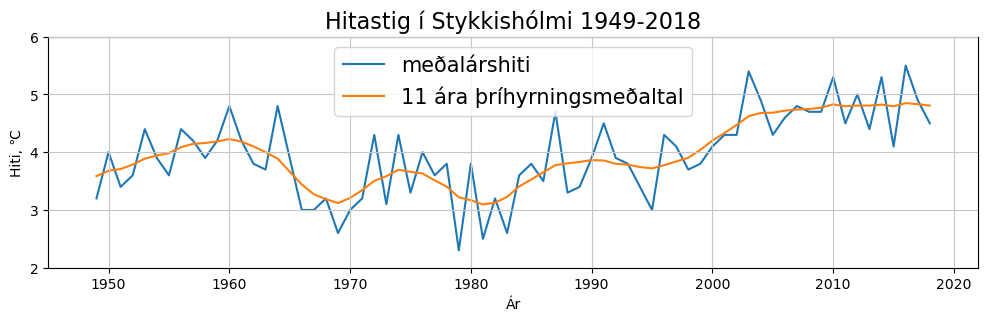

In [94]:
def hlaupmeðal(x, d=5):
  """skilar lista með hlaupandi (2d+1)-sæta þríhyrningsmeðaltali"""
  n = len(x)
  hm = [0]*n
  for i in range(n):
    m = max(0,i-d)
    M = min(n,i+d+1)
    w = [d-abs(k-i) for k in range(m,M)]
    hm[i] = sum([x[m+j]*w[j] for j in range(M-m)])/sum(w)
  return hm
  
plt.figure(figsize=(12,3))
plt.xlim([1945, 2022])
plt.ylim([2, 6])
plt.xticks(np.arange(1950,2021, 10))
plt.yticks(np.arange(2,7))
plt.plot(lw=4, c='b', )
plt.axvline(c='g', lw=1.2)
plt.axhline(c='g', lw=1.2)
plt.grid(True, c='#C5C5C5')
x=np.arange(1949,2019,1)
y=[xi for xi in avg]
y1=[x for x in hlaupmeðal(avg)]
plt.plot(x,y,label='meðalárshiti')
plt.plot(x,y1,label='11 ára þríhyrningsmeðaltal')
plt.title('Hitastig í Stykkishólmi 1949-2018', fontsize='16')
plt.xlabel("Ár")
plt.ylabel("Hiti, ℃")
plt.legend(loc='upper center', fontsize='15')
plt.show()


4. Súlurit af úrkomu Teiknið súlurit af úrkomunni sem lítur nokkurnvegin svona út (myndin er 5x2 tommur og liturinn heitir ‚chocolate‘ en þið megið velja lit að vild):

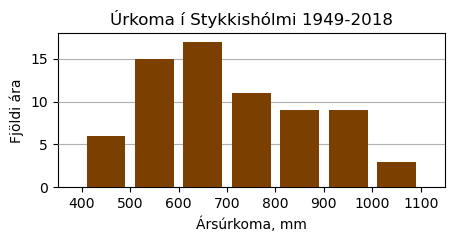

In [67]:
plt.figure(figsize=(5,2))
plt.xlim([350, 1150])
plt.ylim([0,18])
y=[x for x in rainfall]
plt.grid(True, axis='y')
plt.hist(y, bins=7, range=(400,1100), rwidth=0.8, color='#7B3F00', zorder=3)
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Fjöldi ára')
plt.title('Úrkoma í Stykkishólmi 1949-2018')
plt.show()

5. Punktarit af úrkomu og hita. Teiknið að lokum punktarit (scatter plot) af úrkomu og hita. Byrjið á að fá mynd eins og þá sem er vinstra megin að neðan.

Búið svo til til mynd eins og þá sem er hægra megin með því að láta c-stika í scatter vera lista með ártölum. Kallið loks á plt.colorbar(label="ár") (notið samt ykkar nafn á ártalalistanum) og þá birtist litaskalinn sjálfkrafa.

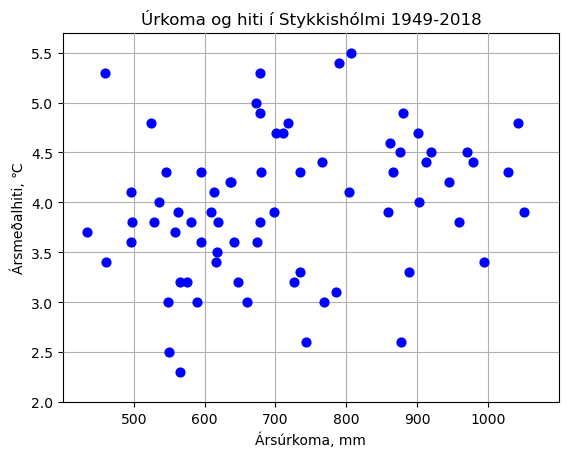

In [88]:
plt.grid(True)
plt.xlim(400,1100)
plt.ylim(2,5.7)
plt.xticks(np.arange(500,1001, 100))
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Ársmeðalhiti, ℃')
plt.title("Úrkoma og hiti í Stykkishólmi 1949-2018")
plt.scatter(rainfall, avg, s=40, c="b", zorder=3)
plt.show()

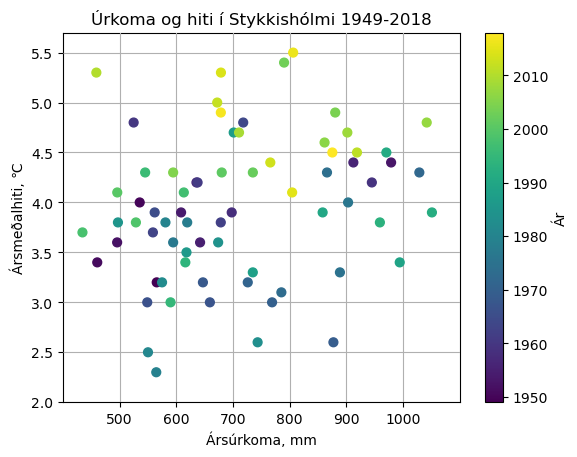

In [93]:
plt.grid(True)
plt.xlim(400,1100)
plt.ylim(2,5.7)
plt.xticks(np.arange(500,1001, 100))
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Ársmeðalhiti, ℃')
plt.scatter(rainfall, avg, c=year, s=40, zorder=3)
plt.colorbar(label="Ár")
plt.title("Úrkoma og hiti í Stykkishólmi 1949-2018")
plt.show()

Túlkun niðurstaðna. Búið til textareit og skrifið nokkrar línur um það hvað lesa má út úr myndunum. Bætið gjarna við viðbótarupplýsingum sem fást með útreikningum í Python (t.d. meðalhiti á tilteknum köldum/hlýjum tímabilum, staðalfrávik einhverra valdra stærða, fylgni milli hita og úrkomu).

Mynd 1 sýnir tvær línur, meðalárshiti er línan sem sýnir hver meðalárshiti var hvert ár. Eins og sést á myndinni þá hefur meðalárshiti verið að hækka frá 1980.
Mynd 2 sýnir hversu mörg ár eru með úrkomu með 100 mm millibili, byrjar í 400 mm og hæsta er 1100 mm. Ársúrkoman var flest ár milli 600 og 700 mm.
Mynd 3 sýnir í punktum hversu mikil ársúrkoma var miðað við meðalhita. Það er ekki hægt að vinna mikið með myndina, hún sýnir bara hvernig úrkoman var fyrir meðalhita. Meðalhitinn var oftast í kringum 3.7 sem er bara sorglegt. 
Mynd 4 sýnir það sama, nema í þessu tilfelli er líka tekið inn ár þannig liturinn sýnir árið og punktarnir eru eins og í fyrra dæmi. Síðasta myndin sínir betur hvernig lífið fer batnandi í Stykkishólmi milli 1990 og 2010. Úrkoman er hinsvegar ekkert að batna, hún er eiginlega bara að versna með hverju ári.
